# Dataset analysis

## For the analysis data of international health, nutrition, and population data collected yearly from 1960-2016 was selected
## Source of selected dataset: https://data.world/data-society/global-health-nutrition-data

### Import of needed libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Reading of data and assigning to variable df

In [475]:
df = pd.read_csv('data.csv')

### View of the first five entries

In [476]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The number of rows and columns in the dataset

In [477]:
df.shape

(89010, 61)

### The data types of the columns in the dataset

In [478]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
Unnamed: 60       float64
Length: 61, dtype: object

### Number of different countries

In [479]:
df['Country Name'].nunique()

258

### List of data by column 'Indicator Name'

In [480]:
df['Indicator Name'].tolist()

['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 0, female, interpolated',
 'Age population, age 0, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, interpolated',
 'Age population, age 02, female, interpolated',
 'Age population, age 02, male, interpolated',
 'Ag

## Part 1: the goal is to get the name of a country with the biggest percentage of deaths due to injury in 2012

### Selecting data based on the value 'Cause of death, by injury (% of total)' in the column 'Indicator Name' and assigning it to the variable death_injury

In [481]:
death_injury = df[df['Indicator Name'] == 'Cause of death, by injury (% of total)']
death_injury

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
71,Arab World,ARB,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.967686,NaN,NaN,NaN,NaN
416,Caribbean small states,CSS,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.037150,NaN,NaN,NaN,NaN
761,Central Europe and the Baltics,CEB,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.409292,NaN,NaN,NaN,NaN
1106,Early-demographic dividend,EAR,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.098080,NaN,NaN,NaN,NaN
1451,East Asia & Pacific,EAS,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.894374,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,Virgin Islands (U.S.),VIR,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87701,West Bank and Gaza,WBG,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88046,"Yemen, Rep.",YEM,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.800000,NaN,NaN,NaN,NaN
88391,Zambia,ZMB,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.700000,NaN,NaN,NaN,NaN


### Creating a new dataset death_injury_2012. The set represents the percentage of deaths due to injury in 2012 in the country.

In [482]:
death_injury_2012 = death_injury[['Country Name', '2012']]
death_injury_2012

,Country Name,2012
71,Arab World,11.967686
416,Caribbean small states,10.037150
761,Central Europe and the Baltics,5.409292
1106,Early-demographic dividend,11.098080
1451,East Asia & Pacific,7.894374
...,...,...
87356,Virgin Islands (U.S.),NaN
87701,West Bank and Gaza,NaN
88046,"Yemen, Rep.",10.800000
88391,Zambia,10.700000


### Checking for missing data

In [483]:
death_injury_2012[death_injury_2012['2012'].isnull()]

,Country Name,2012
10421,Pacific island small states,NaN
15251,American Samoa,NaN
15596,Andorra,NaN
16286,Antigua and Barbuda,NaN
17321,Aruba,NaN
21461,Bermuda,NaN
23531,British Virgin Islands,NaN
26636,Cayman Islands,NaN
27671,Channel Islands,NaN
31466,Curacao,NaN


### Removing rows with missing data

In [484]:
death_injury_2012 = death_injury_2012.dropna()
death_injury_2012

,Country Name,2012
71,Arab World,11.967686
416,Caribbean small states,10.037150
761,Central Europe and the Baltics,5.409292
1106,Early-demographic dividend,11.098080
1451,East Asia & Pacific,7.894374
...,...,...
86666,"Venezuela, RB",21.600000
87011,Vietnam,10.500000
88046,"Yemen, Rep.",10.800000
88391,Zambia,10.700000


### The data is sorted in descending order by the percentage of deaths due to injury in 2012.
### The highest percentage of such deaths was in Syria

In [485]:
death_injury_2012.sort_values(by = ['2012'], ascending=False)

,Country Name,2012
79421,Syrian Arab Republic,48.0
84596,United Arab Emirates,23.3
68726,Qatar,23.3
34571,El Salvador,22.5
86666,"Venezuela, RB",21.6
...,...,...
71831,Serbia,3.5
75626,Spain,3.4
24221,Bulgaria,3.3
54581,"Macedonia, FYR",3.2


## Part 2: the goal is to find out the predicted population growth rate in Lithuania in 2070.

### Data selection based on the value 'Lithuania' of the column 'Country Name' and assignment to the variable df_LT

In [486]:
df_LT = df[df['Country Name'] == 'Lithuania']
df_LT

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
53475,Lithuania,LTU,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53476,Lithuania,LTU,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53477,Lithuania,LTU,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,16.42,16.38,16.34,16.8348,17.3296,17.8244,...,18.92,17.9388,16.9576,15.9764,14.9952,14.014,12.8092,11.6044,NaN,NaN
53478,Lithuania,LTU,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53479,Lithuania,LTU,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53815,Lithuania,LTU,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53816,Lithuania,LTU,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53817,Lithuania,LTU,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53818,Lithuania,LTU,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data selection based on the 'Population growth (annual %)' value of the 'Indicator Name' column and assignment to the variable df_LT

In [487]:
df_LT = df_LT[df_LT['Indicator Name'] == 'Population growth (annual %)']
df_LT

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
53737,Lithuania,LTU,Population growth (annual %),SP.POP.GROW,1.550019,1.606575,1.399731,1.235633,1.242699,1.227446,...,-1.187948,-1.028483,-1.110346,-2.096943,-2.258464,-1.341202,-1.012007,-0.859827,-0.758848,NaN


### Data from the years 1960-2015 are selected and rows are converted to columns and vice versa

In [488]:
df_LT = df_LT.set_index('Indicator Name')
df_LT

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Population growth (annual %),Lithuania,LTU,SP.POP.GROW,1.550019,1.606575,1.399731,1.235633,1.242699,1.227446,1.224198,...,-1.187948,-1.028483,-1.110346,-2.096943,-2.258464,-1.341202,-1.012007,-0.859827,-0.758848,NaN


In [489]:
df_LT = df_LT.loc[:, '1960':'2015']

In [490]:
df_LT = df_LT.transpose()
df_LT

Indicator Name,Population growth (annual %)
1960,1.550019
1961,1.606575
1962,1.399731
1963,1.235633
1964,1.242699
1965,1.227446
1966,1.224198
1967,1.201181
1968,1.125231
1969,0.920479


In [491]:
df_LT = df_LT.rename_axis('Year').reset_index()
df_LT

Indicator Name,Year,Population growth (annual %)
0,1960,1.550019
1,1961,1.606575
2,1962,1.399731
3,1963,1.235633
4,1964,1.242699
5,1965,1.227446
6,1966,1.224198
7,1967,1.201181
8,1968,1.125231
9,1969,0.920479


### Column 'Year' data is changed to float

In [492]:
df_LT['Year'] = df_LT['Year'].astype(float)

In [493]:
df_LT.dtypes

Indicator Name
Year                            float64
Population growth (annual %)    float64
dtype: object

### Checking with Scatter how data is spread out and whether it will be a linear regression

Text(0, 0.5, 'Population growth (annual %)')

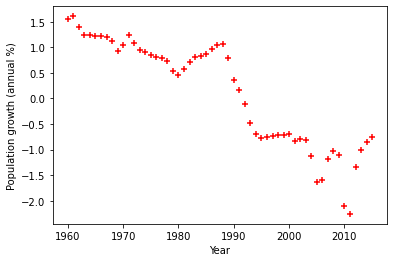

In [494]:
plt.scatter(df_LT['Year'],df_LT['Population growth (annual %)'],color='red', marker='+')
plt.xlabel('Year')
plt.ylabel('Population growth (annual %)')

### Constant variable

In [495]:
x = df_LT[['Year']]

### Free variable

In [496]:
y = df_LT['Population growth (annual %)']

### Splitting data into train/test groups

In [497]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

### Creation of linear regression model

In [498]:
reg = linear_model.LinearRegression()

### Linear regression training

In [499]:
reg.fit(X_train, y_train)

LinearRegression()

### Accuracy of the linear regression model (94%)

In [500]:
reg.score(X_test, y_test)

0.940684806810587

### Linear regression

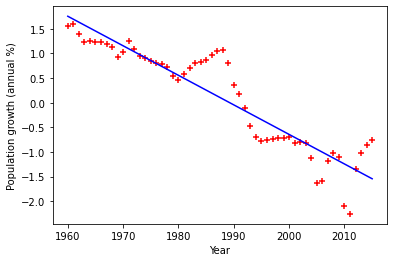

In [501]:
plt.scatter(df_LT['Year'],df_LT['Population growth (annual %)'],color='red', marker='+')
plt.xlabel('Year')
plt.ylabel('Population growth (annual %)')
plt.plot(df_LT['Year'], reg.predict(df_LT[['Year']]),color='blue')

### Forecasted percentage of population increase in Lithuania in 2070. (-4.84%)

In [502]:
reg.predict([[2070]])

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-4.84445998])